In [4]:
# read file
with open("../cleaning/clean_data.csv", encoding="utf8") as file:
	data = file.read().split("\n")

header = data[0]
students = data[1:]

# remove last student (empty student)
students.pop()

total_student = len(students)

# split header
header = header.split(",")
subjects = header[5:]

# split each student in list
for i in range(len(students)):
	students[i] = students[i].split(",")

not_take_exam = [0,0,0,0,0,0,0,0,0,0,0]

# loop through all students
for s in students:
	# iterate through all subjects
	for i in range(5,16):
		if s[i] == "-1":
			not_take_exam[i-5] += 1

not_take_exam_percentage = [0,0,0,0,0,0,0,0,0,0,0]

In [5]:
# convert to percentage
for i in range(0,11):
	not_take_exam_percentage[i] = round(not_take_exam[i]*100/total_student, 2)

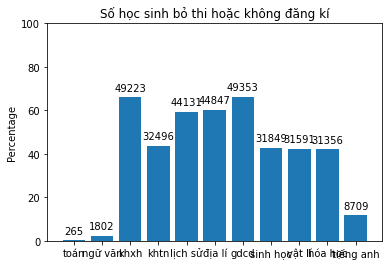

In [6]:
# plot barchart
# https://pythonspot.com/matplotlib-bar-chart/
import matplotlib.pyplot as plt
import numpy 

figure, axis = plt.subplots()

# list from 0-11
y_pos = numpy.arange(len(subjects))

# plot the barchart using 2 list
plt.bar(y_pos, not_take_exam_percentage)

# change horizontal category name
plt.xticks(y_pos, subjects)

# set limit to vertical axis
axis.set_ylim(0,100)

# label and title
plt.ylabel('Percentage')
plt.title('Số học sinh bỏ thi hoặc không đăng kí')

# Draw number of student on top of each bar
# https://stackoverflow.com/questions/28931224/adding-value-labels-on-a-matplotlib-bar-chart
rects = axis.patches
for rect, label in zip(rects, not_take_exam):
    height = rect.get_height()
    axis.text(rect.get_x() + rect.get_width() / 2, height + 2, label, ha='center', va='bottom')

# show the plot
plt.show()